<a href="https://colab.research.google.com/github/Sbcyadav9621/Adventure-works-report-sales-/blob/main/Pytorch_class_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets --quiet
import opendatasets as od
od.download('https://www.kaggle.com/datasets/mssmartypants/rice-type-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sandebhuvanachandra
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 461MB/s]

Importing necessary librarys

---



In [3]:
import torch
import torch.nn as nn
from torch.optim import Adam  # optimizer
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [4]:
data_df = pd.read_csv('/content/rice-type-classification/riceClassification.csv')

In [5]:
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [6]:
# The data set contains numerical values, No character values present in the data set

# Checking data set shape

In [7]:
data_df.shape

(18185, 12)

# Checking data type columns

In [8]:
data_df.dtypes

,0
id,int64
Area,int64
MajorAxisLength,float64
MinorAxisLength,float64
Eccentricity,float64
ConvexArea,int64
EquivDiameter,float64
Extent,float64
Perimeter,float64
Roundness,float64


# Checking information of the data

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


# Checking null values in the dataset

In [10]:
data_df.isna().sum()

,0
id,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Perimeter,0
Roundness,0


# Data set has no null values

# checking duplicate records in the data set

In [11]:
data_df.duplicated().sum()

np.int64(0)

In [12]:
# there is no duplicate records in the dataset

# Checking 5-point summary

In [13]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18185.0,9093.000000,5249.701658,1.000000,4547.000000,9093.000000,13639.000000,18185.000000
Area,18185.0,7036.492989,1467.197150,2522.000000,5962.000000,6660.000000,8423.000000,10210.000000
MajorAxisLength,18185.0,151.680754,12.376402,74.133114,145.675910,153.883750,160.056214,183.211434
MinorAxisLength,18185.0,59.807851,10.061653,34.409894,51.393151,55.724288,70.156593,82.550762
Eccentricity,18185.0,0.915406,0.030575,0.676647,0.891617,0.923259,0.941372,0.966774
ConvexArea,18185.0,7225.817872,1502.006571,2579.000000,6125.000000,6843.000000,8645.000000,11008.000000
EquivDiameter,18185.0,94.132952,9.906250,56.666658,87.126656,92.085696,103.559146,114.016559
Extent,18185.0,0.616653,0.104389,0.383239,0.538530,0.601194,0.695664,0.886573
Perimeter,18185.0,351.606949,29.500620,197.015000,333.990000,353.088000,373.003000,508.511000
Roundness,18185.0,0.707998,0.067310,0.174590,0.650962,0.701941,0.769280,0.904748


# Removing 'id' column from the dataset, which is not useful

In [14]:
data_df = data_df.drop('id',axis=1)

In [15]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [16]:
print(data_df['Class'].unique())

[1 0]


# There are only two classes in the Class column one is "1" & "0".


In [17]:
data_df['Class'].value_counts()

,count
Class,
1,9985
0,8200


# Checking correlation of the dataset

In [18]:
data_df.corr().T

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759
AspectRation,-0.623979,0.240471,-0.860516,0.950301,-0.621472,-0.609957,-0.350875,-0.227256,-0.947875,1.000000,0.832563


# Visualizing the correlation

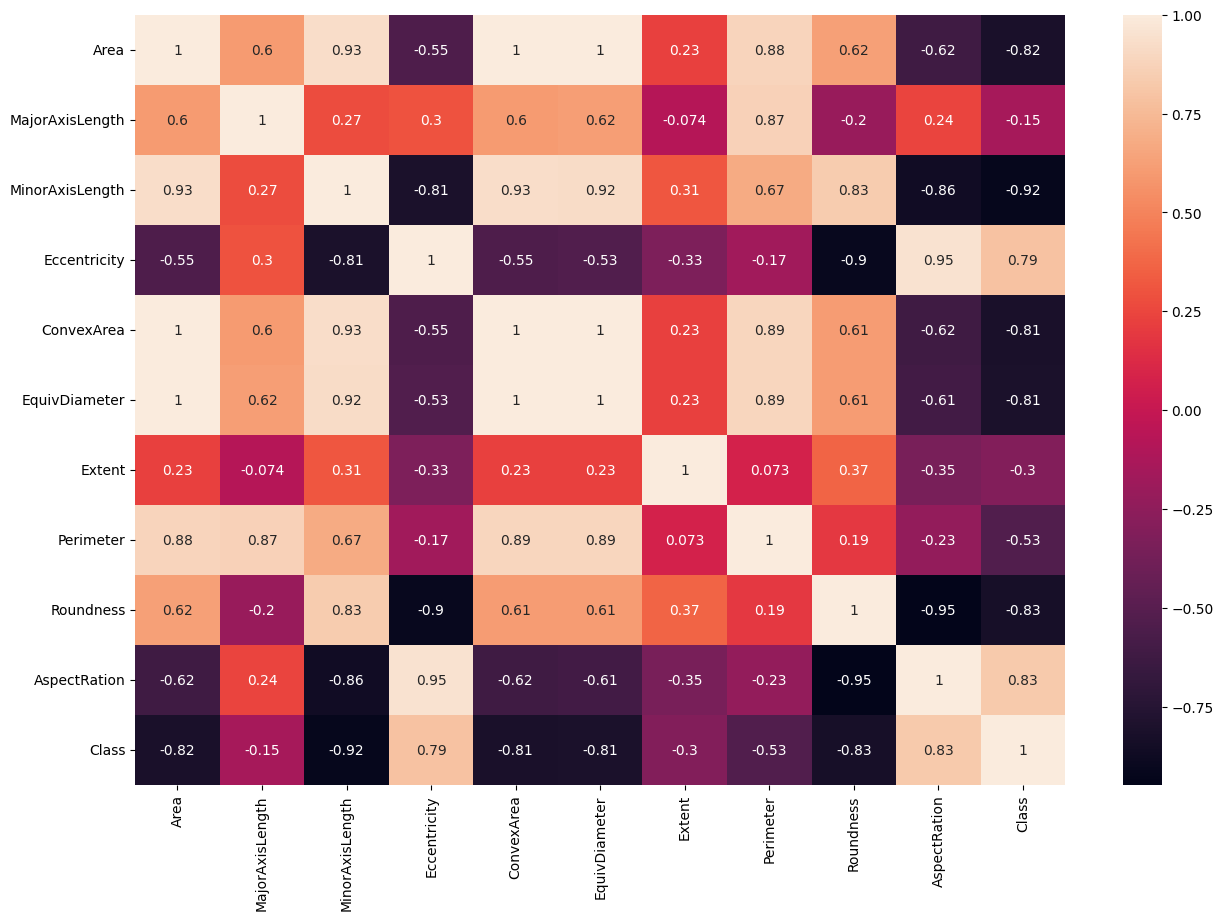

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(),annot=True)
plt.show()

In [20]:
from pylab import rcParams

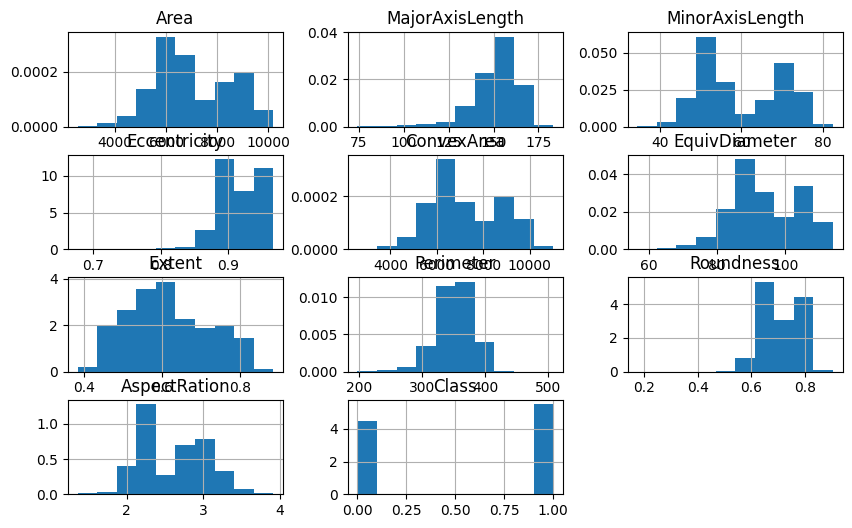

In [21]:
rcParams['figure.figsize'] = 10, 6
data_df.hist(density=True)
plt.show()

# Checking outliers

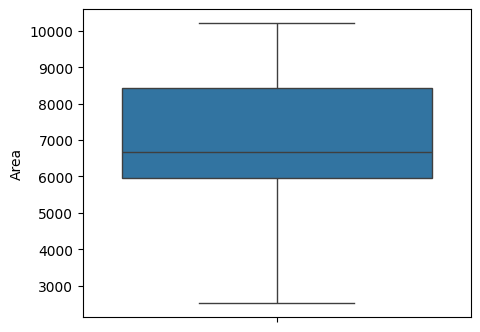

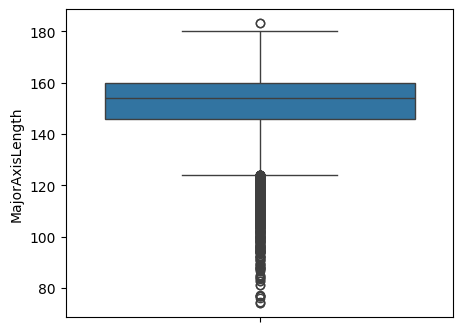

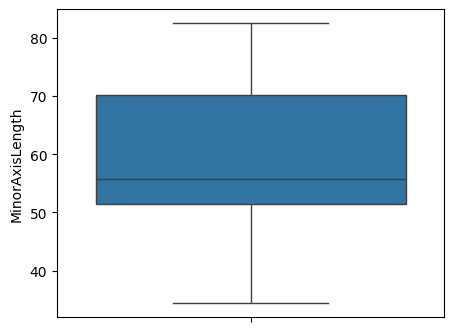

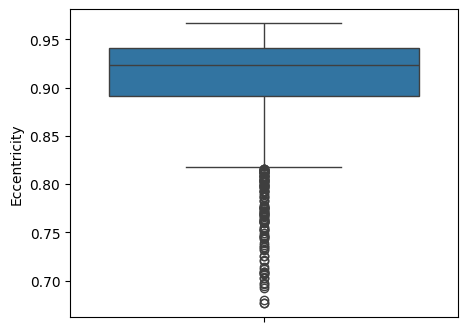

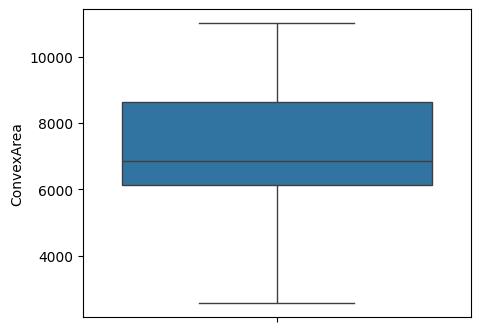

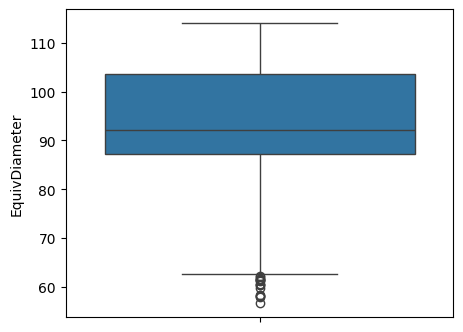

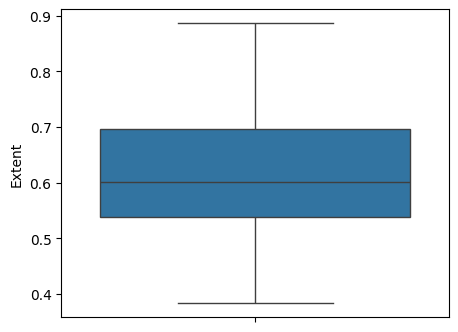

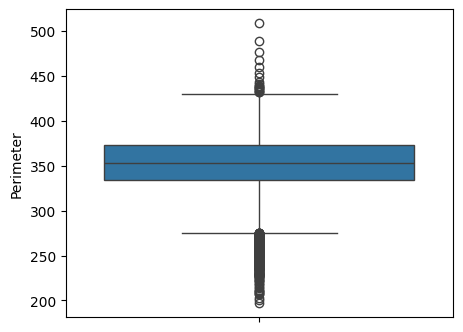

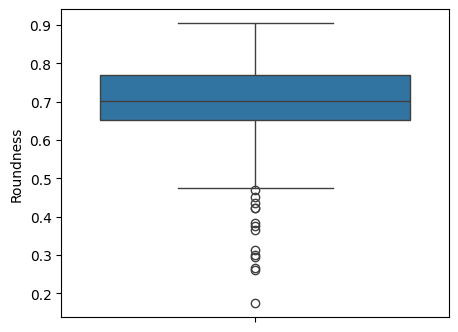

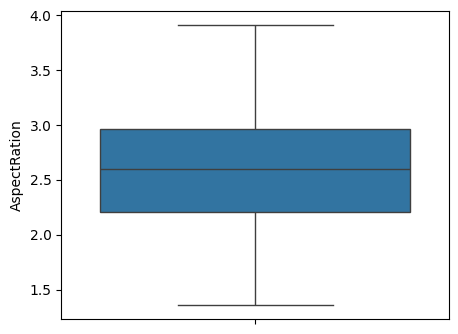

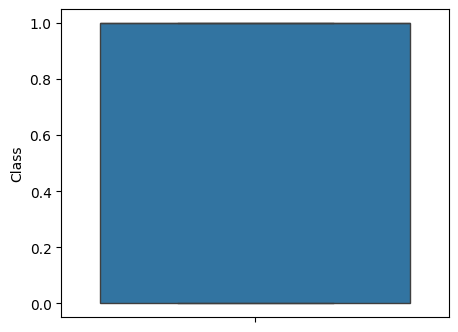

In [22]:
for i in data_df.columns:
  plt.figure(figsize=(5,4))
  sns.boxplot(data_df[i])
  plt.show()

In [23]:
def outlier(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3-q1
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)
  return x.clip(lower = lower_bound,upper = upper_bound)

In [24]:
data_df = data_df.apply(outlier)

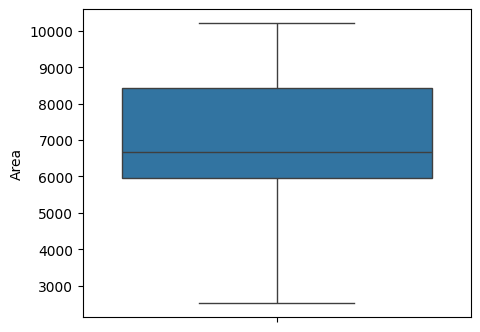

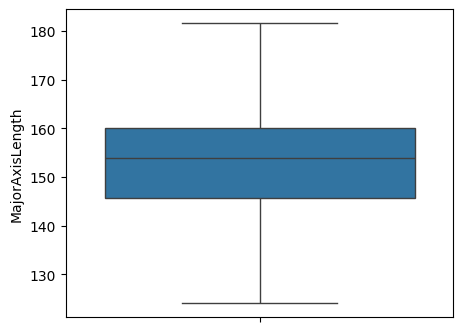

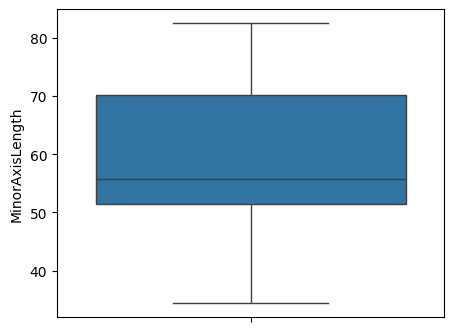

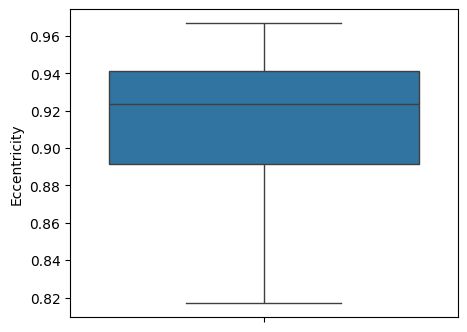

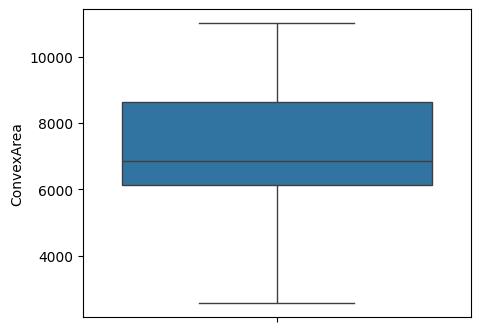

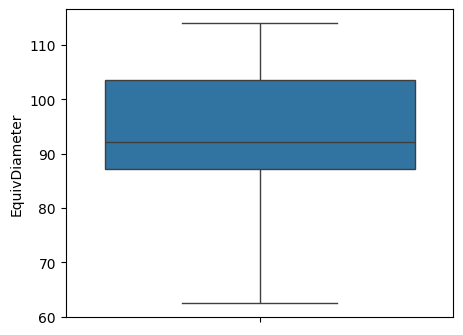

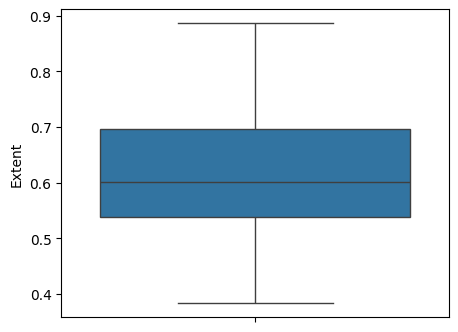

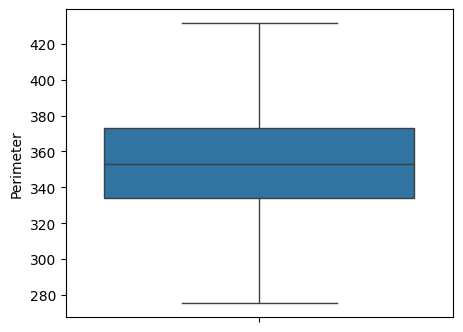

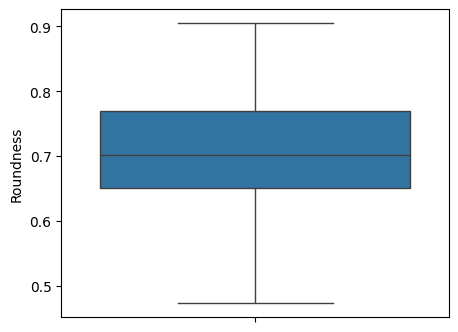

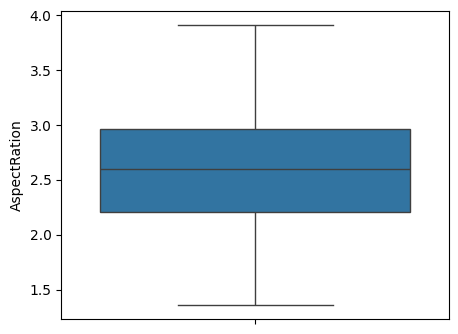

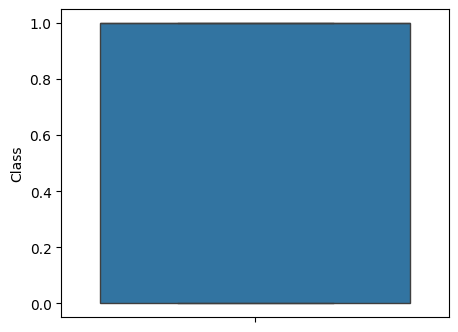

In [25]:
for i in data_df.columns:
  plt.figure(figsize=(5,4))
  sns.boxplot(data_df[i])
  plt.show()

In [26]:
data_df['Class'].value_counts()

,count
Class,
1,9985
0,8200


# Normalization

In [27]:
original_df = data_df.copy()

In [28]:
for column in data_df.columns:
  data_df[column] = (data_df[column] - data_df[column].min()) / (data_df[column].max() - data_df[column].min())

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.262097,0.0,0.614922,0.0,0.248903,0.262456,0.544960,0.0,0.674819,0.032371,1.0
1,0.045525,0.0,0.352934,0.0,0.051726,0.000000,0.655171,0.0,0.830521,0.037204,1.0
2,0.068418,0.0,0.366292,0.0,0.065607,0.000000,0.746848,0.0,0.915794,0.042222,1.0
3,0.071670,0.0,0.363903,0.0,0.068573,0.001424,0.795277,0.0,0.919898,0.049077,1.0
4,0.152315,0.0,0.456247,0.0,0.145094,0.118236,0.767156,0.0,0.930425,0.059471,1.0


In [29]:
data_df.Class.value_counts()

,count
Class,
1.0,9985
0.0,8200


# Splitting the data

In [30]:
X = data_df.drop('Class',axis=1)
y = data_df['Class']

# Splitting the data into training and testing

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.3,random_state=42)

In [33]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape,y_val.shape)

(12729, 10) (12729,)
(3819, 10) (3819,)
(1637, 10) (1637,)


In [35]:
class dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X.values, dtype=torch.float32).to(device)
        self.Y = torch.tensor(Y.values, dtype=torch.float32).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.Y[index]

In [36]:
training_data = dataset(X_train,y_train)
validation_data = dataset(X_val,y_val)
testing_data = dataset(X_test,y_test)

In [37]:
training_data

In [38]:
train_dataloader = DataLoader(training_data, batch_size = 8,shuffle = True)
validation_dataloader = DataLoader(validation_data, batch_size = 8, shuffle = True)
testing_dataloader = DataLoader(testing_data, batch_size=8, shuffle = True)

In [39]:
train_dataloader

In [42]:
for x, y in train_dataloader:
  print(x)
  print('--')
  print(y)
  break

tensor([[0.2477, 0.1278, 0.1869, 0.8473, 0.2329, 0.2443, 0.3006, 0.0993, 0.4255,
         0.6540],
        [0.3057, 0.0822, 0.3107, 0.7122, 0.2875, 0.3159, 0.2571, 0.1363, 0.5143,
         0.4901],
        [0.5118, 0.5499, 0.4048, 0.8093, 0.4851, 0.5470, 0.5782, 0.4836, 0.4298,
         0.5997],
        [0.5047, 0.5479, 0.3923, 0.8181, 0.4782, 0.5395, 0.2010, 0.5236, 0.3643,
         0.6116],
        [0.4931, 0.0935, 0.5910, 0.3822, 0.4635, 0.5273, 0.4672, 0.2500, 0.7621,
         0.2747],
        [0.4079, 0.3756, 0.3329, 0.8091, 0.3821, 0.4346, 0.8878, 0.2988, 0.4911,
         0.5995],
        [0.4632, 0.2415, 0.4831, 0.6110, 0.4369, 0.4953, 0.5360, 0.3146, 0.5847,
         0.4052],
        [0.5473, 0.6187, 0.4175, 0.8209, 0.5081, 0.5838, 0.3603, 0.5036, 0.4665,
         0.6154]])
--
tensor([1., 1., 1., 1., 0., 1., 1., 1.])


In [47]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer = nn.Linear(X.shape[1],HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

In [48]:
model = MyModel().to(device)

In [50]:
summary(model,(X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [51]:
criterion =nn.BCELoss()
optimizer = Adam(model.parameters(),lr=0.001)

In [70]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs  = 10
for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

  for data in train_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(dim=1)

    batch_loss = criterion(prediction,labels)

    total_loss_train += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()


    total_acc_train += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in validation_dataloader:
      inputs, labels = data

      prediction = model(inputs).squeeze(dim=1)

      batch_loss = criterion(prediction,labels)

      acc = ((prediction).round() == labels).sum().item()

      total_acc_val += acc
    total_loss_train_plot.append(round(total_loss_train/1000,4))
    total_loss_validation_plot.append(round(total_loss_val/1000,4))

    total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100, 4))
    total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__() * 100, 4))

    print(f'''Epoch no. {epoch+1} Train Loss: {round(total_loss_train/1000, 4)} Train Accurayc {round(total_acc_train/training_data.__len__() * 100,4)}
          Validation Loss:{round(total_loss_val/1000,4)} Validation Accuracy: {round(total_acc_val/validation_data.__len__() * 100,4)}''')
    print("------------------------------------------")


Epoch no. 1 Train Loss: 0.0649 Train Accurayc 98.633
          Validation Loss:0.0 Validation Accuracy: 98.2285
------------------------------------------
Epoch no. 2 Train Loss: 0.0646 Train Accurayc 98.6645
          Validation Loss:0.0 Validation Accuracy: 98.1674
------------------------------------------
Epoch no. 3 Train Loss: 0.065 Train Accurayc 98.6488
          Validation Loss:0.0 Validation Accuracy: 98.2285
------------------------------------------
Epoch no. 4 Train Loss: 0.0641 Train Accurayc 98.6173
          Validation Loss:0.0 Validation Accuracy: 98.1674
------------------------------------------
Epoch no. 5 Train Loss: 0.0637 Train Accurayc 98.6645
          Validation Loss:0.0 Validation Accuracy: 98.2896
------------------------------------------
Epoch no. 6 Train Loss: 0.0628 Train Accurayc 98.7195
          Validation Loss:0.0 Validation Accuracy: 98.2285
------------------------------------------
Epoch no. 7 Train Loss: 0.063 Train Accurayc 98.7352
          Val

In [71]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in testing_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion(prediction,labels)
    total_loss_test += batch_loss_test.item()

    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc

  print('Accuracy:', round(total_acc_test/testing_data.__len__() * 100, 4))


Accuracy: 99.0573


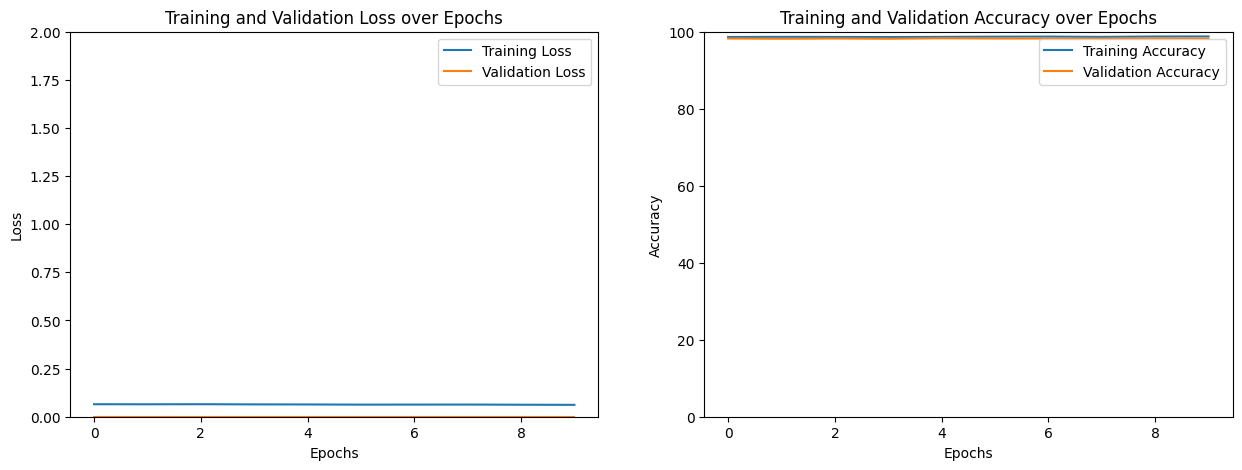

In [75]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loss Plot
axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_validation_plot, label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0, 2])
axs[0].legend()

# Accuracy Plot
axs[1].plot(total_acc_train_plot, label='Training Accuracy')
axs[1].plot(total_acc_validation_plot, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0, 100])
axs[1].legend()

plt.show()